<a href="https://colab.research.google.com/github/AndresMontesDeOca/RegresionAvanzada/blob/main/Machete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHETE

#### Logbook

In [25]:
# 31/05/23 -> Creacion de la Notebook
# 31/05/23 -> Tests Normalidad, Homocedasticidad Residuos
# 06/06/23 -> Test No-autoorrelacion de Residuos
# 17/06/23 -> Transfomraciones Box Clox
# 19/06/23 -> Migrated to Google Colab
# 20/06/23 -> R Magic
# 22/06/23 -> Deteccion Outliers e Influyentes

In [26]:


# Autor: Andres Montes de Oca

# Instalacion de Paquetes
!pip install pingouin # No incluido en Google Colab
# !pip install scipy
# !pip install statsmodels


# Cargamos Librerias y Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt

# Ignorar Warnings
import warnings
warnings.filterwarnings('ignore')

# Asthetics
sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=1, color_codes=True)

# Recursion limit errors with R Magic
import sys
# sys.setrecursionlimit(50000)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## R Magic in Google Colab

In [27]:
# Version rpy2 que no tiene problemas de compatibilidad
!pip install rpy2==3.5.1

# activate R magic
%load_ext rpy2.ipython

# Import rpy2 for dataframe conversion
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import globalenv


# ###### Pandas DataFrames and Series conversion ########
# # Cargamos un DataSet cualquira en Python, para que no de error
# data_P = sns.load_dataset('iris')
# Serie = data_P['petal_length']

# # Convert the Python DataFrame to the R dataframe
# %R -i data_P

# with localconverter(ro.default_converter + pandas2ri.converter):
#   data_R = ro.conversion.py2rpy(data_P)
# # Create a variable name in R's Global Environment
# globalenv['data_R'] = data_R

# # Convert Python Series to R vectors
# vec_float_R = ro.vectors.FloatVector(Serie)
# # vec_int_R = ro.vectors.IntVector(Serie)
# # vec_str_R = ro.vectors.StrVector(Serie)
# globalenv['vec_float_R'] = vec_float_R

# # Convert R datadrame/vector to Python DataFrame/Vector
# %R -o data_R

# with localconverter(ro.default_converter + pandas2ri.converter):
#   data_P = ro.conversion.rpy2py(data_R)

# # Importar R-Functions a Python como Objetos(sin uso)
# shapiro_test = ro.r('shapiro.test')
# result = shapiro_test(vec_float_R)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


#### Instalaciones Individuales en Bash

In [28]:
# system(sudo apt install libgsl-dev) # -> Rapido

#### Instalacion de Librerias para R en Google Colab

In [29]:
%%R

### MVN Henze-Zirkler Test ### -> Lento
# # system(sudo apt install libgsl-dev)
# install.packages('MVN')

### Wald Test ### -> Rapido
# install.packages('aod')

### QQ Plot, Bonferroni ### -> Lento
# install.packages('car')

### LRM Tests ###
# install.packages('lmtest')

### Box-Cox Transformation ### -> Rapido
# install.packages('MASS')


####################################
### Installation Status ###
# print(system.file(package='MVN'))

NULL


## Cargas de Datasets from Google Drive

In [30]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

################################# Datasets ###################################
# Grasa de Cerdos
id = '153lGVzdixcHT-keKg8qmvaoWdPHg6_tB'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('grasacerdos.xlsx')
dataG = pd.read_excel('grasacerdos.xlsx', index_col='Obs') # Cargamos el Dataset
dataG = dataG.replace(to_replace=',', value='.', regex=True) # Reemplazo , por .
dataG = dataG.astype('float') # Transformo en float
%R -i dataG

######################################################
# Peso, Edad, Colesterol
id = '17Dv1WcWlc9ojWa6bnSfD7TCRaVKCKqj0'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('peso_edad_colest.xlsx')
dataP = pd.read_excel('peso_edad_colest.xlsx')
%R -i dataP

# # Convert the Python DataFrame to the R dataframe
# with localconverter(ro.default_converter + pandas2ri.converter):
#   dataP_R = ro.conversion.py2rpy(dataP)
# # Create a variable name in R's Global Environment
# globalenv['dataP_R'] = dataP_R

######################################################
# Cars con Modelo Lineal
id = '15pf-6P4Ek2rp6mYmfOybHRqAxqOoTp6i'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('cars.csv')
dataC = pd.read_csv('cars.csv')
model_cars = smf.ols('dist ~ speed', data=dataC).fit()
%R -i dataC

######################################################
# University
id = '16kLQNXhyweAi38xR2IeQCCagVcU725UZ'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('University.csv')
dataU = pd.read_csv('University.csv')
%R -i dataU

######################################################
# Iris(Python)
dataI = sns.load_dataset('iris')

# # Iris(R) -> DataFrame to dataframe
# with localconverter(ro.default_converter + pandas2ri.converter):
#   dataI_R = ro.conversion.py2rpy(dataI.drop(columns='species'))
# # Create a variable name in R's global environment
# globalenv['dataI_R'] = dataI_R

# # Serie to Vector
# x_R = ro.FloatVector(dataI['petal_length'])
# w_R = ro.FloatVector(dataI['petal_width'])
# globalenv['x_R'] = x_R
# globalenv['w_R'] = w_R
%R -i dataI

######################################################
# Gorriones
id = '15G6jIOMiuWaTs-qy7eUXwhED4delBMl6'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('gorriones.xlsx')
dataO = pd.read_excel('gorriones.xlsx')
dataO.rename(columns=
            {'largototal':'Largo', 'extension ':'Alas', 'cabeza':'Cabeza',
             'humero':'Pata', 'esternon':'Cuerpo', 'sobrevida ':'Target'},
            inplace=True)
%R -i dataO


# 1) Relacion Lineal
Relationship between independent var (x) and depedent var (y) is linear

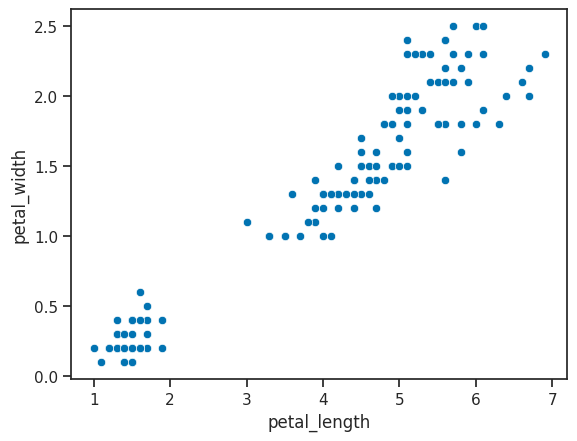

In [31]:
sns.scatterplot(data=dataI, x='petal_length', y='petal_width')
plt.show()

# Transformmations for making relationships linear. Polynomial or Exponential for any of both

# 2) Multicollonearity
Eeach independent variable should be independent from other independent variables

,n,r,CI95%,p-val,BF10,power
pearson,150,0.962865,"[0.95, 0.97]",4.675004e-86,1.113e+82,1.0


,n,r,CI95%,p-val,power
spearman,150,0.937667,"[0.91, 0.95]",8.156597e-70,1.0


<Axes: >

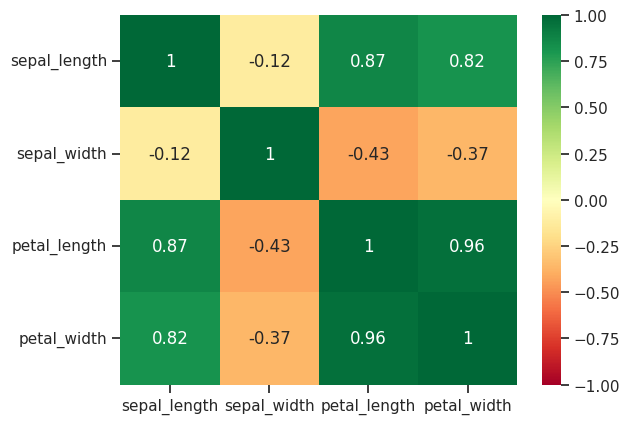

In [32]:
display(pg.corr(dataI['petal_length'], dataI['petal_width'], method='pearson')) # Entre dos varibales, H0 -> Variables Independientes
display(pg.corr(dataI['petal_length'], dataI['petal_width'], method='spearman')) # Cuando no se cumplen los supuestos de Pearson
display(sns.heatmap(dataI.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)) # Todos contra todos

# 3) Bi-Variate Normality
Multivariate Normality in Variables

,W,pval,normal
sepal_width,0.984917,0.101126,True


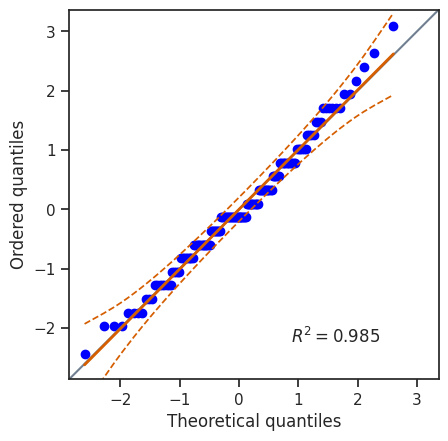

HZResults(hz=2.3363942003154383, pval=4.141311629927849e-19, normal=False)


In [33]:
# Tests analiticos para Single
display(pg.normality(dataI['sepal_width'])) # Shapiro Test(single Var), H0 -> Normal Dist

# Otros tests
# st.anderson(dataI['sepal_width'], dist='norm') # Anderson-Darling SciPy
# st.kstest(dataI['sepal_width'], 'norm')# Kolmogorov-Smirnov SciPy

# Test grafico para Single
pg.qqplot(dataI['sepal_width']) # QQ Plot
plt.show()

# Test analitico para Multi
print(pg.multivariate_normality(dataI.drop(columns='species'))) # Henze-Zirkler Test, H0 -> Multiv Normal Dist

#### R Magic

In [34]:
# Otros Tests en R
%%R

# library(car)
# qqPlot(dataI$sepal_width) # Observaciones que romperian con el supuesto de Normalidad

# library(MVN)
# mvn_result <- mvn(dataI, mvnTest = 'hz')
# print(mvn_result)

NULL


# X) Linear Regression Models

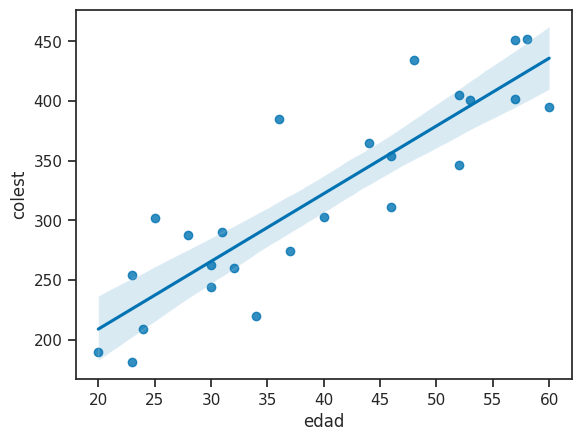

In [35]:
# LRM en Python
dataP = sm.add_constant(dataP)
model_colest = smf.ols('colest ~ edad', data=dataP).fit()

sns.regplot(data=dataP, x='edad', y='colest')
plt.show()

#### R Magic

In [36]:
# LRM en R
%%R

model_colest_R = lm('colest ~ edad', data=dataP)
# print(summary(model_colest_R))
# print(anova(model_colest_R))

# Bandas de Prediccion
predichos <- predict(object=model_colest_R, interval='prediction', level=0.95)
nuevos_datos <- data.frame(predichos, dataP)

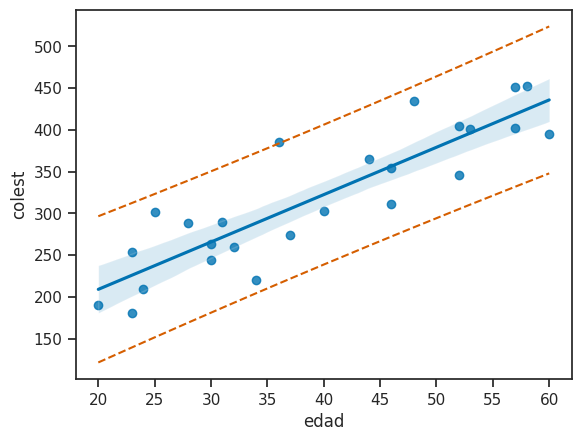

In [37]:
# Exporto a Python
%R -o nuevos_datos

# Grafico
sns.regplot(data=nuevos_datos, x='edad', y='colest')
sns.lineplot(data=nuevos_datos, x='edad', y='lwr', linestyle='--', color='r')
sns.lineplot(data=nuevos_datos, x='edad', y='upr', linestyle='--', color='r')
plt.show()

# x) Wald Test (revisar)
Mide si la Variable X es lo suficientemente significativa como para explicar la Y

#### R Magic

In [38]:
# # Wald Test -> Significatividad de cada Variable
# %%R

# library(aod)

# # Generamos el Modelo
# model_gorr = lm('Largo ~ Alas + Cabeza + Pata + Cuerpo', data=dataO)
# print(summary(model_gorr))

# # Wald Test para indentificar variables significativas
# wald.test(Sigma = vcov(model_gorr), b = coef(model_gorr), Terms = 4) # Cuerpo| H0: Coef = 0 (Var no significativa)


# 4) Residuals Normality With 0 Mean
Model residuals should follow a normal distribution, with 0 as mean

In [39]:
# Primero hay que generar el Modelo de Regresion Lineal
display(pg.normality(model_colest.resid))
print('Mean:', model_colest.resid.mean())

# If distribution is not normal, regression results will be biased
# and it may highlight that there are outliers or other assumptions being violated

,W,pval,normal
0,0.964775,0.517479,True


Mean: 5.0022208597511053e-14


# 5) Residuals Variance (Homosedasticity)
The variance of residual is the same for any value of x

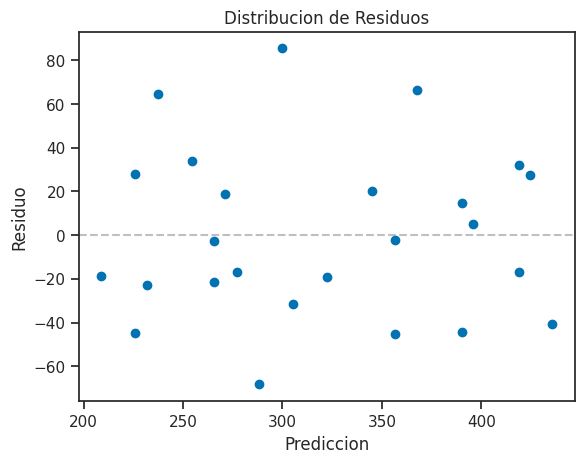

Estadistico BP y p-value: 0.15820998430559063 0.6908099159134585


In [40]:
# Analsis grafico a mano usando Matplotlib
plt.scatter(x=model_colest.predict(), y=model_colest.resid)
plt.xlabel( 'Prediccion')
plt.ylabel('Residuo')
plt.title('Distribucion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()
# No se observa estructura de embudo

# Analitico (C Test) -> H0: Residuos Homocedasticos
BP, p_value, _, _ =sm.stats.het_breuschpagan(model_colest.resid, model_colest.model.exog)
print('Estadistico BP y p-value:', BP, p_value)

#### R Magic

In [41]:
# # Breusch-Pagan Homosedasticity Test
# %%R

# library(lmtest)
# bptest(model_colest_R)

# 6) Correlacion de Residuos
Aleatoriedad en el orden de las observacioens

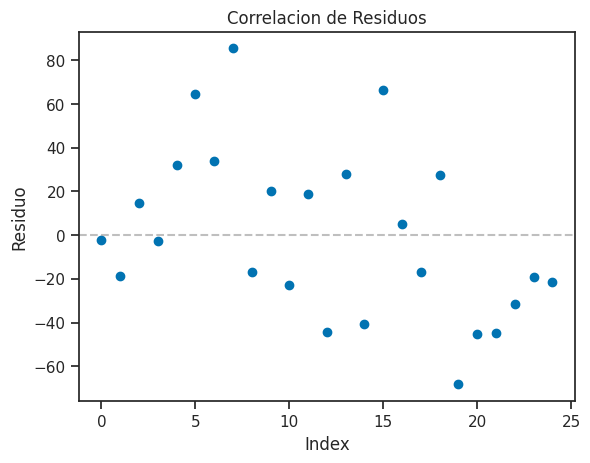

Durbin-Watson: 1.7830788132512603


In [42]:
# Analsis grafico a mano usando Matplotlib
plt.scatter(x=dataP.index, y=model_colest.resid)
plt.xlabel( 'Index')
plt.ylabel('Residuo')
plt.title('Correlacion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()
# No se observa estructura

# Durbin-Watson Test: 2=No Correlacion (Independecia?)| 0=Correlacion Pos | 4=Correlacion Neg
print('Durbin-Watson:', sm.stats.durbin_watson(model_colest.resid)) # Sin validacion Estadistica

#### R Magic

In [43]:
# # Durbin-Watson No Auto-Correlation Test
# %%R

# library(lmtest)
# dwtest(model_colest_R, alternative='two.sided', iterations=1000) #H0 No Auto-Correlacion

# 7) Deteccion de Valores Outliers e Influyentes

In [44]:
# # No Outliers tests found in Python
%%R

# library(car)

# # Outliers - Bonferroni
# qqPlot(residuos)
# outlierTest(model_colest_R)
# influenceIndexPlot(model_colest_R, vars='Bonf')

# # Influyentes - Leverage
# crit_leverage <- 3*mean(hatvalues(model_colest_R))
# leverage <- hatvalues(model_colest_R) > crit_leverage
# print(sum(leverage))
# print(cbind(hatvalues(model_colest_R), crit_leverage, leverage))

# # Influyentes - Cook
# influenceIndexPlot(model_colest_R, vars='Cook')

# # Influyentes - DFFITS (revisar indices en plot)
# p <- length(model_colest_R$coefficients)
# n <- NROW(model_colest_R$residuals)
# dffits_crit <- 2*sqrt(p/n)
# dffits <- dffits(model_colest_R)
# data_dffits <- data.frame(dffits=dffits)

# Influyentes - DFBetas
# dfbetas_crit <- 1 # Umbral estandard
# dfbetas(model_colest_R)[,2]>dfbetas_crit

NULL


In [45]:
# # Exporto a Python y grafico
# %R -o data_dffits
# %R -o dffits_crit

# data_dffits.head()
# sns.scatterplot(data=data_dffits, x=data_dffits.index, y='dffits')
# plt.axhline(y=dffits_crit, linestyle='--', color='red')
# plt.axhline(y=-dffits_crit, linestyle='--', color='red')

# plt.show()

# 9) Transformaciones
- Cuando los residuos no siguen una distribucion Normal -> Transformamos la y (BoxCox)
- Cuando los residuos tienen estructura -> Transformamos/Agregamos en X

ShapiroResult(statistic=0.9450908899307251, pvalue=0.02152523212134838)


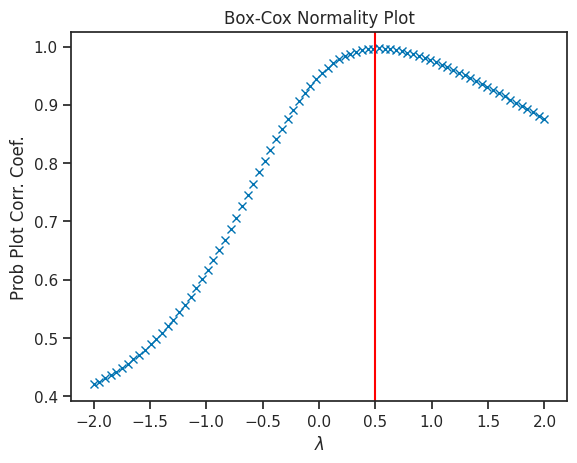

          W      pval  normal
0  0.973323  0.314302    True


In [46]:
# Boc Cox Transformation Python
# Verificamos la Normalidad de los residuos
print(st.shapiro(model_cars.resid))
data = dataC
y = data['dist']

# Calculo Lambda
maxlog = st.boxcox(y)[1]
st.boxcox_normplot(y, -2, 2, plt)
plt.axvline(maxlog, color='red')
plt.show()

# Transfomracion: Si Lambda  = 0 -> np.log10(y) | y**Lambda
y_trans = pd.Series(y**.5, name='y_trans')
# No olvidarse de anti-transformar para los IC(10**predicted)

# Generamos el nuevo Dataset con la y transformada
data = pd.concat([data, y_trans], axis=1)

# Generamos el nuevo modelo con la y_transformada
model_cars_trans = smf.ols('y_trans ~ speed', data=data).fit()

# Verificamos la nueva normalidad de los residuos
print(pg.normality(model_cars_trans.resid))


	Shapiro-Wilk normality test

data:  mod_cars$resid
W = 0.94509, p-value = 0.02152


	Shapiro-Wilk normality test

data:  mod_cars2$resid
W = 0.97332, p-value = 0.3143



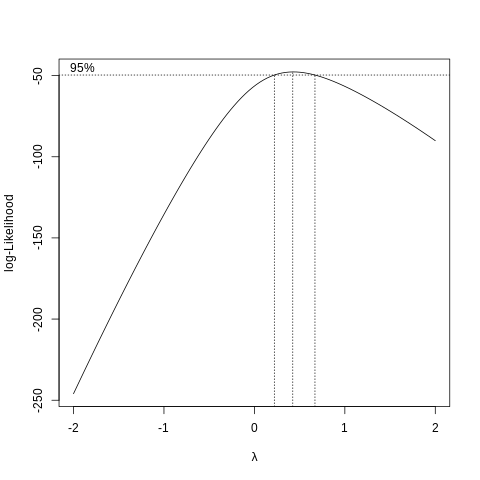

In [47]:
# Box Cox Transformation R

%%R
library(MASS)

# Generamos el modelo y verificamos la Normalidad de los residuos
mod_cars <- lm('dist ~ speed', data=dataC)
print(shapiro.test(mod_cars$resid))

# Buscamos el Landa optimo -> Si Lambda  = 0 -> log10(y) | y**Lambda
boxcox(object = mod_cars, plotit=TRUE)

# Generamos el nuevo modelo con la variable dependiente transformada, y verificamos su nueva normalidad
mod_cars2 <- lm('dist**0.5 ~ speed', data=dataC)
print(shapiro.test(mod_cars2$resid))

# No olvidarse de anti-transformar en los IC, IP y Fit